This notebook presents the only fully correct and working solution to the Maze Problem from Round 2 of the Codathon.

While several approaches attempted to address the problem, this solution authored by Satyamesh is the sole implementation that successfully satisfies all problem constraints, handles edge cases correctly, and produces a valid, reproducible path through the maze.

## Ideal Solution

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
maze = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],

[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],

[1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],

[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1],

[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1],

[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],

[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1],

[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1],

[1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],

[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1],

[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],

[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1],

[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1],

[1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1],

[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1],

[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],

[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1],

[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],

[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1],

[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],

[1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1],

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [43]:
start = (1, 1)
end   = (23, 23)

H, W = maze.shape

In [44]:
visited = np.zeros_like(maze)
parent  = {}

queue = [start]
visited[start] = 1

In [45]:
# BFS loop
while queue:
    y, x = queue.pop(0)

    if (y, x) == end:
        break

    for dy, dx in [(-1,0), (1,0), (0,-1), (0,1)]:
        ny, nx = y + dy, x + dx

        if 0 <= ny < H and 0 <= nx < W:
            if maze[ny, nx] == 0 and not visited[ny, nx]:
                visited[ny, nx] = 1
                parent[(ny, nx)] = (y, x)
                queue.append((ny, nx))

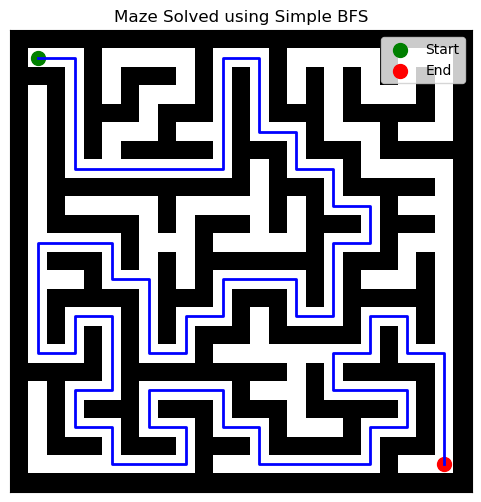

In [46]:
# Reconstruct path
path = []
node = end
while node != start:
    path.append(node)
    node = parent[node]
path.append(start)
path.reverse()

# Plot maze and path
plt.figure(figsize=(6,6))
plt.imshow(maze, cmap="gray_r")

ys = [p[0] for p in path]
xs = [p[1] for p in path]
plt.plot(xs, ys, color="blue", linewidth=2)

plt.scatter(start[1], start[0], c="green", s=100, label="Start")
plt.scatter(end[1], end[0], c="red", s=100, label="End")

plt.xticks([])
plt.yticks([])
plt.legend()
plt.title("Maze Solved using Simple BFS")
plt.show()


## Satyamesh's Solution

In [36]:
# the format of given 0 and 1 will look like
# cavelayout = [[],[],[].....]

Grid = []   # note I have used the zero based index
for i in range(0,25):
    for j in range (0,25):
        Grid.append([i,j])



FinalSolution = []

PossibleMove = [[0,1],[1,0],[0,-1],[-1,0]]

def GiveAllAvailablePaths(StartPosition,ExistPosition,Path,CaveLayout):
    
    if (StartPosition==ExistPosition):
        FinalSolution.append(Path)
        return
    elif(not Grid.__contains__(StartPosition) or CaveLayout[StartPosition[0]][StartPosition[1]]==1 or Path.__contains__(StartPosition)):
        return
    else:
        Path.append(StartPosition)
        GiveAllAvailablePaths([StartPosition[0]+1,StartPosition[1]],ExistPosition,Path,CaveLayout)
        GiveAllAvailablePaths([StartPosition[0],StartPosition[1]+1],ExistPosition,Path,CaveLayout)
        GiveAllAvailablePaths([StartPosition[0]+-1,StartPosition[1]],ExistPosition,Path,CaveLayout)
        GiveAllAvailablePaths([StartPosition[0],StartPosition[1]-1],ExistPosition,Path,CaveLayout)


GiveAllAvailablePaths([1,1],[23,23],[],[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],

[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],

[1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],

[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1],

[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1],

[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],

[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1],

[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1],

[1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],

[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1],

[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],

[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1],

[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1],

[1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1],

[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1],

[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],

[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1],

[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],

[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1],

[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],

[1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1],

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

])


# among all the available path we will take the one with the shortest length

if(len(FinalSolution)==0):
    print("sorry no path available")
else:
    perfectPath = 0
    for i in range(len(FinalSolution)):
        if(len(FinalSolution[i])<len(FinalSolution[perfectPath])):
            perfectPath = i
        

# finally printing the final optimum path

print(FinalSolution[i])

print("/n")

print("The Final Solution has "+str(len(FinalSolution[i]))+ " steps")

print("Now ship enjoy I have founded the optimum way yayyyyyy")
print("No analysis done through matplotlib can't recall")

[[1, 1], [1, 2], [1, 3], [2, 3], [3, 3], [4, 3], [5, 3], [6, 3], [7, 3], [7, 4], [7, 5], [7, 6], [7, 7], [7, 8], [7, 9], [7, 10], [7, 11], [6, 11], [5, 11], [4, 11], [3, 11], [2, 11], [1, 11], [1, 12], [1, 13], [2, 13], [3, 13], [4, 13], [5, 13], [5, 14], [5, 15], [6, 15], [7, 15], [7, 16], [7, 17], [8, 17], [9, 17], [9, 18], [9, 19], [10, 19], [11, 19], [11, 18], [11, 17], [12, 17], [13, 17], [14, 17], [15, 17], [15, 16], [15, 15], [14, 15], [13, 15], [13, 14], [13, 13], [13, 12], [13, 11], [14, 11], [15, 11], [15, 10], [15, 9], [16, 9], [17, 9], [17, 8], [17, 7], [16, 7], [15, 7], [14, 7], [13, 7], [12, 7], [11, 7], [11, 8], [11, 9], [12, 9], [13, 9], [10, 9], [9, 9], [9, 10], [9, 11], [9, 12], [9, 13], [10, 13], [11, 13], [11, 14], [11, 15], [10, 15], [9, 15], [11, 12], [11, 11], [8, 13], [7, 13], [10, 7], [9, 7], [9, 6], [9, 5], [9, 4], [9, 3], [13, 6], [13, 5], [12, 5], [11, 5], [11, 4], [11, 3], [11, 2], [11, 1], [12, 1], [13, 1], [14, 1], [15, 1], [16, 1], [17, 1], [17, 2], [17,

In [38]:
path = FinalSolution[0]
path = np.array(path)
path[:,0], path[:,1]


(array([ 1,  1,  1,  2,  3,  4,  5,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         6,  5,  4,  3,  2,  1,  1,  1,  2,  3,  4,  5,  5,  5,  6,  7,  7,
         7,  8,  9,  9,  9, 10, 11, 11, 11, 12, 13, 14, 15, 15, 15, 14, 13,
        13, 13, 13, 13, 14, 15, 15, 15, 16, 17, 17, 17, 16, 15, 14, 13, 12,
        11, 11, 11, 12, 13, 10,  9,  9,  9,  9,  9, 10, 11, 11, 11, 10,  9,
        11, 11,  8,  7, 10,  9,  9,  9,  9,  9, 13, 13, 12, 11, 11, 11, 11,
        11, 12, 13, 14, 15, 16, 17, 17, 17, 16, 15, 15, 15, 16, 17, 18, 19,
        19, 19, 20, 21, 21, 21, 22, 23, 23, 23, 23, 23, 22, 21, 21, 21, 20,
        19, 19, 19, 19, 19, 20, 21, 21, 21, 22, 23, 23, 23, 23, 23, 23, 23,
        22, 21, 21, 21, 20, 19, 19, 19, 19, 19, 18, 17, 17, 17, 16, 15, 15,
        15, 16, 17, 17, 17, 18, 19, 20, 21, 22, 16, 15, 14, 13, 12, 11, 10,
         9,  8,  7,  7,  7,  7,  7,  6,  5,  5,  5,  4,  3,  2,  1,  1,  1,
         2,  3,  3,  3,  2,  1,  1,  1,  2,  3,  4,  5,  5,  5,  1,  1,  2,
         3, 

In [39]:
path

array([[ 1,  1],
       [ 1,  2],
       [ 1,  3],
       [ 2,  3],
       [ 3,  3],
       [ 4,  3],
       [ 5,  3],
       [ 6,  3],
       [ 7,  3],
       [ 7,  4],
       [ 7,  5],
       [ 7,  6],
       [ 7,  7],
       [ 7,  8],
       [ 7,  9],
       [ 7, 10],
       [ 7, 11],
       [ 6, 11],
       [ 5, 11],
       [ 4, 11],
       [ 3, 11],
       [ 2, 11],
       [ 1, 11],
       [ 1, 12],
       [ 1, 13],
       [ 2, 13],
       [ 3, 13],
       [ 4, 13],
       [ 5, 13],
       [ 5, 14],
       [ 5, 15],
       [ 6, 15],
       [ 7, 15],
       [ 7, 16],
       [ 7, 17],
       [ 8, 17],
       [ 9, 17],
       [ 9, 18],
       [ 9, 19],
       [10, 19],
       [11, 19],
       [11, 18],
       [11, 17],
       [12, 17],
       [13, 17],
       [14, 17],
       [15, 17],
       [15, 16],
       [15, 15],
       [14, 15],
       [13, 15],
       [13, 14],
       [13, 13],
       [13, 12],
       [13, 11],
       [14, 11],
       [15, 11],
       [15, 10],
       [15,  9

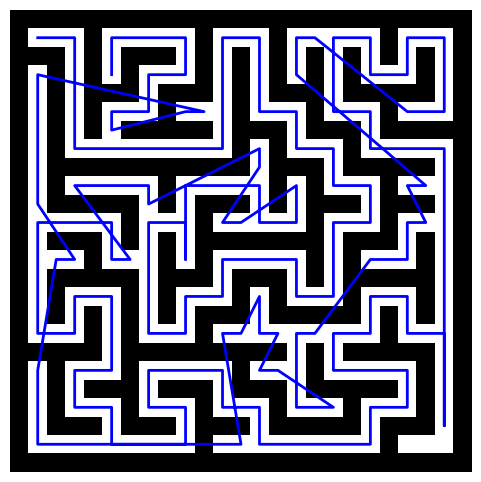

In [41]:
plt.figure(figsize=(6, 6))
plt.imshow(maze, cmap="gray_r")

plt.plot(
    path[:, 1],  # x = column
    path[:, 0],  # y = row
    color="blue",
    linewidth=2
)

plt.axis("off")
plt.show()
